In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv("D:/One Drive/OneDrive - University of Bristol/Bristol Data Science/Project/Data/Weather/data_weather.csv")

#### basic information

In [169]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [170]:
df.info

<bound method DataFrame.info of            date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8

#### chech the missing value

In [171]:
print(df.isnull().sum())

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


## Missing data

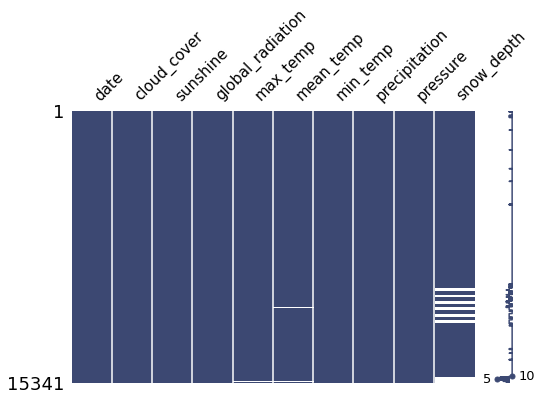

In [45]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, figsize=(8,5), fontsize=15, color=(0.237, 0.286, 0.45))
plt.show()

## 直方图&密度图

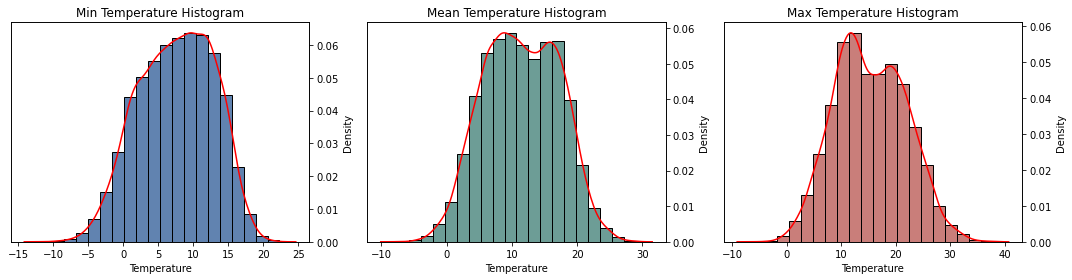

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形大小
plt.figure(figsize=(15, 4))

# 创建第一个子图：mean_temp的直方图和密度图
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='mean_temp', bins=20, kde=False, color=(0.237, 0.486, 0.45))
plt.title('Mean Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.gca().axes.get_yaxis().set_visible(False)  # 隐藏y轴标签

ax2 = plt.gca().twinx()  # 创建共享x轴的新y轴
sns.kdeplot(data=df, x='mean_temp', ax=ax2, color='red')
ax2.set_ylabel('Density')

# 创建第二个子图：max_temp的直方图和密度图
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='max_temp', bins=20, kde=False, color=(0.722, 0.324, 0.304))
plt.title('Max Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.gca().axes.get_yaxis().set_visible(False)  # 隐藏y轴标签

ax3 = plt.gca().twinx()  # 创建共享x轴的新y轴
sns.kdeplot(data=df, x='max_temp', ax=ax3, color='red')
ax3.set_ylabel('Density')

# 创建第三个子图：min_temp的直方图和密度图
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='min_temp', bins=20, kde=False, color=(0.173, 0.353, 0.588))
plt.title('Min Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.gca().axes.get_yaxis().set_visible(False)  # 隐藏y轴标签

ax4 = plt.gca().twinx()  # 创建共享x轴的新y轴
sns.kdeplot(data=df, x='min_temp', ax=ax4, color='red')
ax4.set_ylabel('Density')

# 调整图形布局
plt.tight_layout()

# 显示图形
plt.show()

## oulier

In [47]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

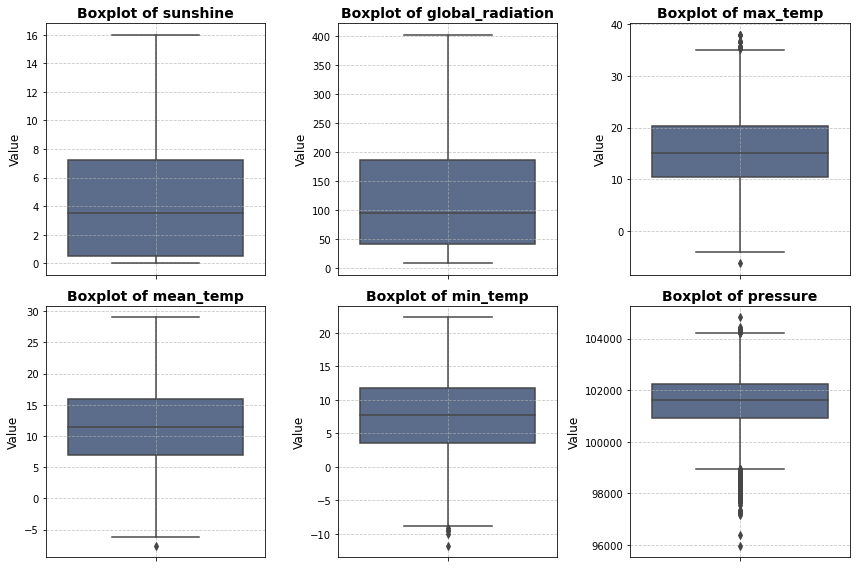

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择需要查看异常值的列
columns_to_check = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure']

# 计算行数和列数
num_rows = 2
num_cols = 3

# 创建子图布局
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# 绘制每个列的箱线图
for idx, column in enumerate(columns_to_check):
    row = idx // num_cols
    col = idx % num_cols
    ax = sns.boxplot(data=df, y=column, ax=axes[row, col], color=(0.33, 0.42, 0.58))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Boxplot of {column}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(axis='both', labelsize=10)

# 调整子图布局
plt.tight_layout()
plt.show()


In [33]:
del df['date']

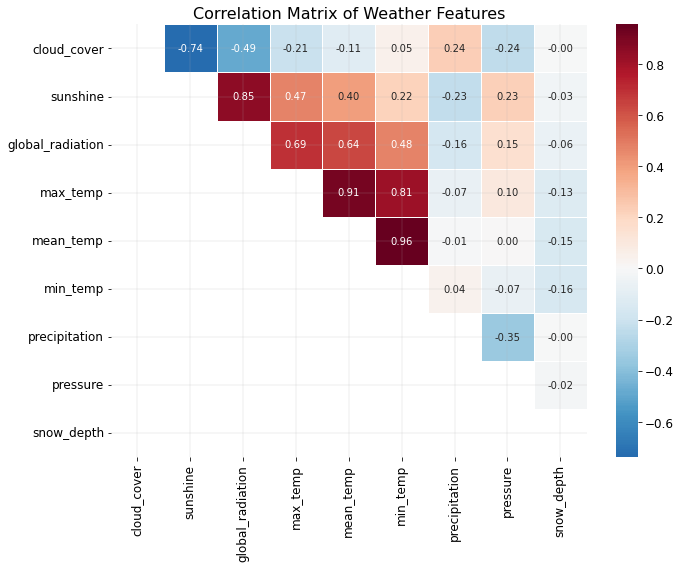

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
correlation_matrix = df.corr()

# 创建遮蔽矩阵，只显示下半部分
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# 设置图形大小
plt.figure(figsize=(10, 8))

# 绘制热图
heatmap = sns.heatmap(data=correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Weather Features', fontsize=16)

# 调整标签字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 添加颜色条
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# 添加网格线
plt.grid(linewidth=0.2)

plt.tight_layout()
plt.show()


#### fill the missing data with KNN

In [234]:
# all the columns are continous value column

In [123]:
from sklearn.impute import KNNImputer

columns_with_missing_values = df.columns[df.isnull().any()].tolist()
imputer = KNNImputer(n_neighbors=5)  
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

In [91]:
print(df.isnull().sum())

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


#### delete the outlier data

In [9]:
df.head

<bound method NDFrame.head of            date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8  

In [10]:
df.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [11]:
def remove_outliers(df, col_name, method='iqr', k = 0):
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_threshold = q3 + k*iqr
    lower_threshold = q1 - k*iqr
    outliers = (df[col_name] > upper_threshold) | (df[col_name] < lower_threshold)
    
    df = df[~outliers].reset_index(drop=True)
    return df

In [12]:
col = ['sunshine', 'global_radiation', 'max_temp','mean_temp', 'min_temp', 'pressure']

for col in df[col]:
    df = remove_outliers(df, col, method='iqr', k=1.5)

In [13]:
df.head

<bound method NDFrame.head of            date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15076  20201224          2.0       1.3              32.0       6.1        6.1   
15077  20201225          6.0       3.5              40.0       4.6        2.6   
15078  20201226          5.8       2.1              38.0      10.0        4.9   
15079  20201230          6.0       0.4              22.0       5.6        2.7   
15080  20201231          7.0       1.3              34.0       1.5       -0.8  

In [14]:
inf_check = np.isinf(df)
print(inf_check.any())

date                False
cloud_cover         False
sunshine            False
global_radiation    False
max_temp            False
mean_temp           False
min_temp            False
precipitation       False
pressure            False
snow_depth          False
dtype: bool


In [15]:
nan_check = df.isna()
print(nan_check.any())

date                False
cloud_cover         False
sunshine            False
global_radiation    False
max_temp            False
mean_temp           False
min_temp            False
precipitation       False
pressure            False
snow_depth          False
dtype: bool
